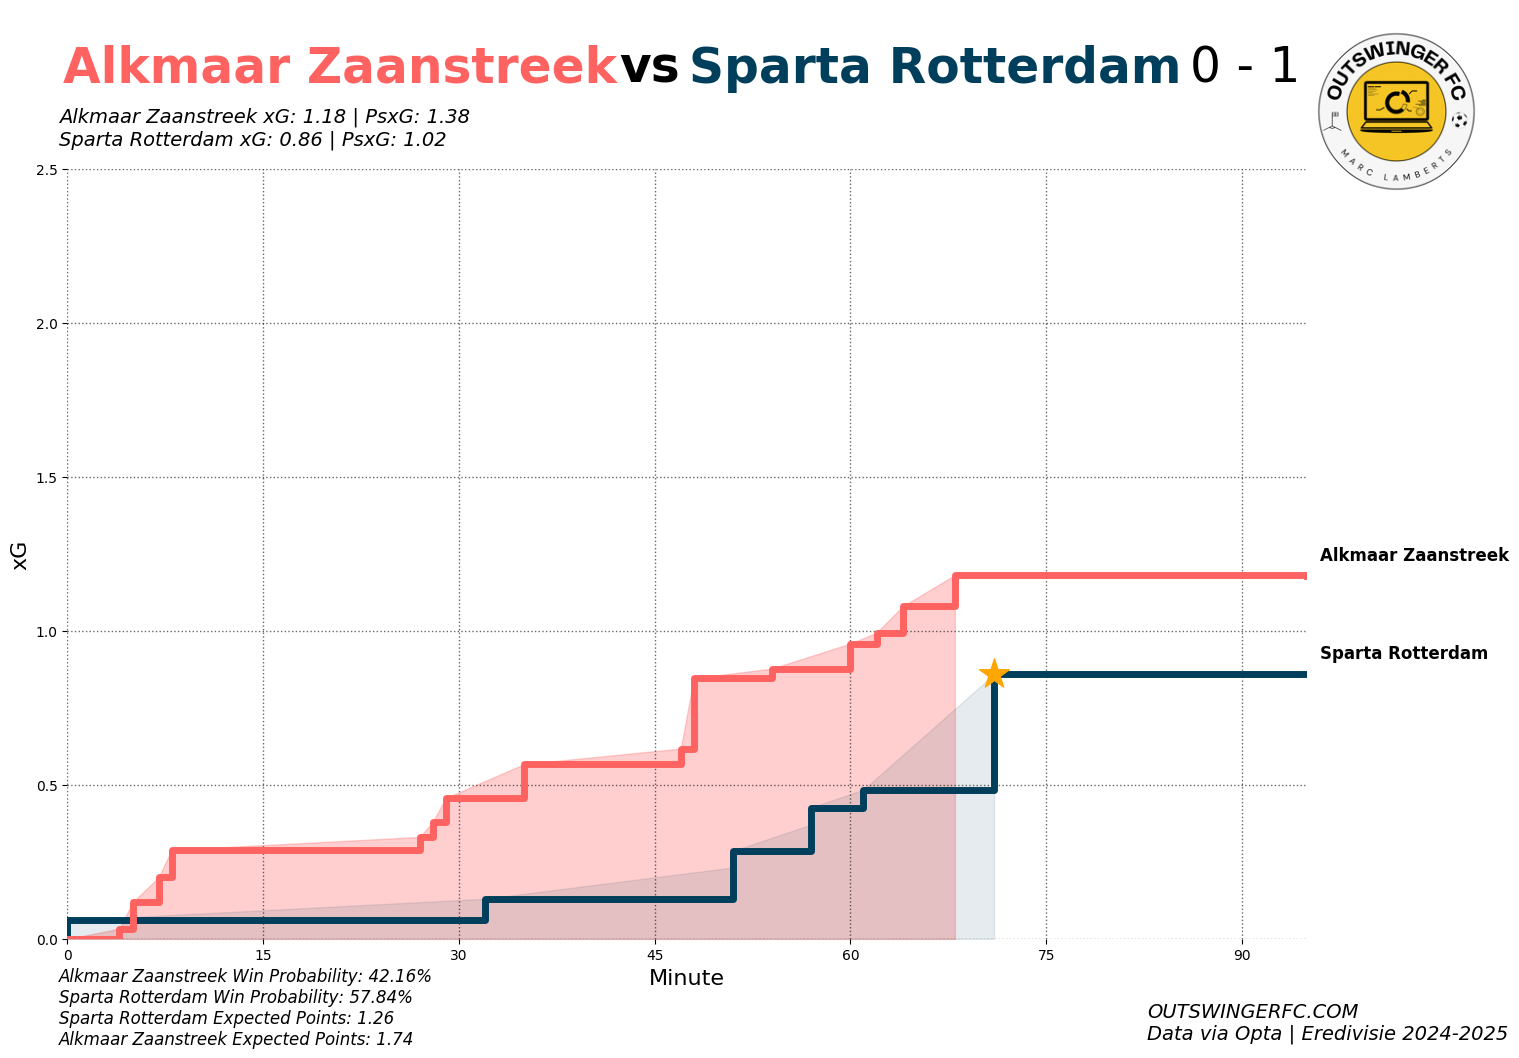

In [103]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load the data
file_path = '/Users/marclambertes/Python/Eredivisie 2024-2025/xgCSV/2025-01-26_Alkmaar Zaanstreek - Sparta Rotterdam.csv' 
df = pd.read_csv(file_path) 

# Extract home and away teams from the dataset
hteam = df['HomeTeam'].iloc[0]  # Home team is from the first row
ateam = df['AwayTeam'].iloc[-1]  # Away team is from the last row

# Now create the lists to store xG and minutes for both teams
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]
a_psxg = [0]
h_psxg = [0]

# Track the minutes when goals are scored
a_goals_min = []
h_goals_min = []

for x in range(len(df['xG'])):
    if df['TeamId'][x] == ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['timeMin'][x])
        a_psxg.append(df['PsxG'][x] if 'PsxG' in df.columns else 0)
        if df['isGoal'][x] == 1:  # Goal scored
            a_goals_min.append(df['timeMin'][x])
    if df['TeamId'][x] == hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['timeMin'][x])
        h_psxg.append(df['PsxG'][x] if 'PsxG' in df.columns else 0)
        if df['isGoal'][x] == 1:  # Goal scored
            h_goals_min.append(df['timeMin'][x])

# Function to calculate cumulative xG and PsxG
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

a_psxg_cumulative = nums_cumulative_sum(a_psxg)
h_psxg_cumulative = nums_cumulative_sum(h_psxg)

# Get the total xG and PsxG for both teams
alast = round(a_cumulative[-1], 2)
hlast = round(h_cumulative[-1], 2)
a_psxg_last = round(a_psxg_cumulative[-1], 2)
h_psxg_last = round(h_psxg_cumulative[-1], 2)

# Calculate win probabilities and expected points
total_xg = alast + hlast
team1_win_prob = alast / total_xg
team2_win_prob = hlast / total_xg
draw_prob = 1 - (team1_win_prob + team2_win_prob)

# Expected Points Calculation
team1_xp = (3 * team1_win_prob) + (1 * draw_prob)
team2_xp = (3 * team2_win_prob) + (1 * draw_prob)

# Create the figure with a larger size and white background
fig, ax = plt.subplots(figsize=(16, 10))  # Make the plot larger here
fig.set_facecolor('white')  # Set background to white
ax.patch.set_facecolor('white')  # Set the plot background to white

# Set up the base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

# Make grid more visible
ax.grid(ls='dotted', lw=1, color='black', axis='y', zorder=1, which='both', alpha=0.6)  # Thicker grid lines with black color
ax.grid(ls='dotted', lw=1, color='black', axis='x', zorder=1, which='both', alpha=0.6)  # Thicker grid lines with black color

# Remove spines
spines = ['top', 'bottom', 'left', 'right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

# Set the x and y axis labels
plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute', fontsize=16)
plt.ylabel('xG', fontsize=16)

# Fill between areas based on cumulative xG for each team
if hlast > alast:
    ax.fill_between(h_min, h_cumulative, color='#ff6361', alpha=0.3)
    ax.fill_between(a_min, a_cumulative, color='#003f5c', alpha=0.1)
else:
    ax.fill_between(h_min, h_cumulative, color='#ff6361', alpha=0.1)
    ax.fill_between(a_min, a_cumulative, color='#003f5c', alpha=0.3)

# Plot step graphs for each team
a_min.append(95)
a_cumulative.append(alast)
h_min.append(95)
h_cumulative.append(hlast)

ax.set_xlim(0, 95)
ax.set_ylim(0, 2.5)

ax.step(x=a_min, y=a_cumulative, color='#003f5c', label=f'{ateam}\nTotal xG: {alast:.2f}\nTotal PsxG: {a_psxg_last:.2f}', linewidth=5, where='post')
ax.step(x=h_min, y=h_cumulative, color='#ff6361', label=f'{hteam}\nTotal xG: {hlast:.2f}\nTotal PsxG: {h_psxg_last:.2f}', linewidth=5, where='post')


# Add annotations
ax.annotate(ateam, xy=(a_min[-1], a_cumulative[-1]), xytext=(a_min[-1] + 1, a_cumulative[-1] + 0.05), color='black', fontsize=12, fontweight='bold')
ax.annotate(hteam, xy=(h_min[-1], h_cumulative[-1]), xytext=(h_min[-1] + 1, h_cumulative[-1] + 0.05), color='black', fontsize=12, fontweight='bold')

# Add stars for goals on the cumulative xG line (only for goals)
for goal in a_goals_min:
    ax.scatter(goal, a_cumulative[a_min.index(goal)], color='#ffa600', marker='*', s=500, label=f'{ateam} Goal', zorder=3)

for goal in h_goals_min:
    ax.scatter(goal, h_cumulative[h_min.index(goal)], color='#ffa600', marker='*', s=500, label=f'{hteam} Goal', zorder=3)

# Title with different colors for home and away teams
title = f"{hteam} vs {ateam} - {team1_goals} - {team2_goals}"

# Set the home team's color to #ff6361 and away team's color to #003f5c, and "vs" in black
ax.text(0.22, 1.1, f"{hteam}", fontsize=35, color="#ff6361", fontweight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(0.47, 1.1, "vs", fontsize=35, color="black", fontweight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(0.7, 1.1, f"{ateam}", fontsize=35, color="#003f5c", fontweight='bold', ha='center', va='bottom', transform=ax.transAxes)
# Calculate goals for both teams (assuming 'isGoal' is a column indicating whether a goal was scored)
home_goals = df[(df['TeamId'] == hteam) & (df['isGoal'] == 1)].shape[0]  # Count of goals for home team
away_goals = df[(df['TeamId'] == ateam) & (df['isGoal'] == 1)].shape[0]  # Count of goals for away team

score = f"{home_goals} - {away_goals}"
ax.text(0.95, 1.1, score, fontsize=35, color="black", ha='center', va='bottom', transform=ax.transAxes)

# Add subtitle with xG and PsxG values and adjust the position to avoid overlap
subtitle = f"{hteam} xG: {hlast:.2f} | PsxG: {h_psxg_last:.2f}\n{ateam} xG: {alast:.2f} | PsxG: {a_psxg_last:.2f}"
fig.text(0.12, 0.9, subtitle, ha='left', va='bottom', fontsize=14, color='black', fontstyle='italic')

# Footer text
fig.text(0.80, 0.01, 'OUTSWINGERFC.COM\nData via Opta | Eredivisie 2024-2025', fontstyle='italic', fontsize=14, color='black')

# Add logo in top-right corner
logo_path = 'Outswinger FC (3).png'  # Replace with the path to your logo file
logo_img = mpimg.imread(logo_path)  # Read the logo image

# Create the logo image and place it at the top-right corner of the plot
imagebox = OffsetImage(logo_img, zoom=0.7)  # Adjust zoom for scaling the logo
ab = AnnotationBbox(imagebox, (1.15, 1.2), frameon=False, xycoords='axes fraction', box_alignment=(1, 1))

# Add the logo to the plot
ax.add_artist(ab)

# Calculate win probabilities and expected points
total_xg = alast + hlast
team1_win_prob = alast / total_xg
team2_win_prob = hlast / total_xg
draw_prob = 1 - (team1_win_prob + team2_win_prob)

# Expected Points Calculation
team1_xp = (3 * team1_win_prob) + (1 * draw_prob)
team2_xp = (3 * team2_win_prob) + (1 * draw_prob)

# Add win probability and expected points in bottom-left corner
win_prob_text = f"{hteam} Win Probability: {team1_win_prob * 100:.2f}%\n{ateam} Win Probability: {team2_win_prob * 100:.2f}%\n"
xp_text = f"{ateam} Expected Points: {team1_xp:.2f}\n{hteam} Expected Points: {team2_xp:.2f}"

fig.text(0.12, 0.001, win_prob_text + xp_text, ha='left', va='bottom', fontsize=12, fontstyle='italic', color='black')


# Save and display the plot
plt.savefig('xgflow_with_home_away_team_colored_titles.png', dpi=500, bbox_inches='tight', facecolor='white')
plt.show()
